In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [4]:
tsvfile="/Users/yuyanq/Desktop/M2-2/UE plate-formes pour le TAL/2_ubuntu_sample.tsv"

with open(tsvfile, 'r') as f:
    df = pd.read_csv(f, sep="\t",names = ["ID", "Q", "R"])
print(df.head(5))   
print(df.shape) # (1000, 3)

   ID                                                  Q   
0   1  how to get the `` your battery is broken '' me...  \
1   3  how can i set the software center to install s...   
2   5  what are some alternatives to upgrading withou...   
3   6                  how to set up a headless server ?   
4   7            how do i run a successful ubuntu hour ?   

                                                   R  
0  everytime i turn on my computer , i see a mess...  
1  how can i set the software center to allow non...  
2  what are some alternatives to upgrading withou...  
3  i have a ubuntu development server at work . i...  
4  i 'm taking my be-stickered laptop to a coffee...  
(1000, 3)


In [7]:
bon_appariement =0
resul ={}
#### concaténation Q & R :  texts[0:1000] (0-999)-> Q # texts[1000:2000] (1000-1999-> Q
X = pd.concat([df['Q'], df['R']]) 

#### Calcul des distances entre les paires de questions et de réponses
vectorizer = TfidfVectorizer()# analyzer="word",ngram_range=(1,2)) #stop_words='english')
X = vectorizer.fit_transform(X)

for dist_name in['cityblock', 'cosine','euclidean', 'l1', 'l2', 'manhattan']: 
    dist_matrix = pairwise_distances(X[:len(df)], X[len(df):], metric=dist_name)
    bon_appariement =0
    ####  Appariement des paires
    for i in range(len(df)):
        matched_index = dist_matrix[i].argmin()
        #print(f"Q{df['ID'].iloc[i]}: {df['Q'].iloc[i]}")
        #print(f"A{df['ID'].iloc[matched_index]}: {df['R'].iloc[matched_index]}\n")
        if {df['ID'].iloc[i]} == {df['ID'].iloc[matched_index]}:
            bon_appariement +=1
    resul[dist_name]=bon_appariement/len(df)
    #### Taux d'appariement correct
print(resul)

{'cityblock': 0.035, 'cosine': 0.632, 'euclidean': 0.632, 'l1': 0.035, 'l2': 0.632, 'manhattan': 0.035}


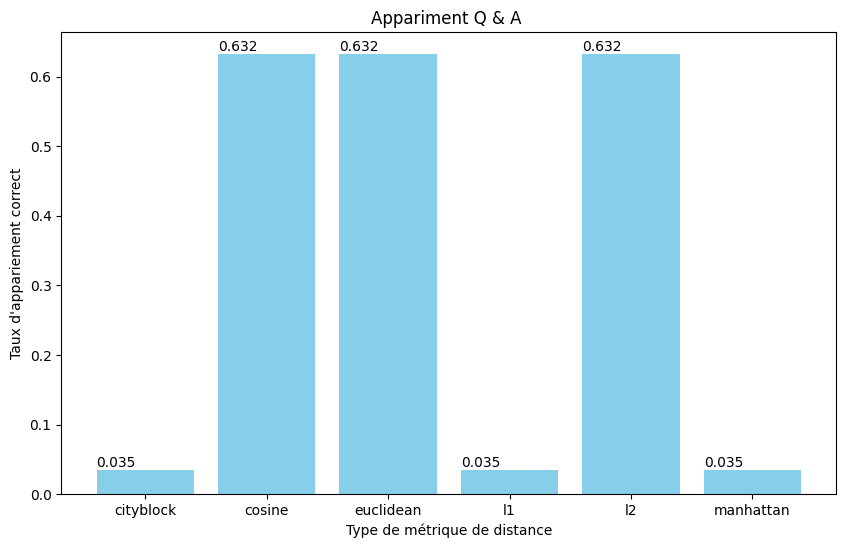

In [8]:
labels = list(resul.keys())
values = list(resul.values())

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

plt.xlabel('Type de métrique de distance')
plt.ylabel("Taux d'appariement correct")
plt.title('Appariment Q & A ')

for bar in bars:
    yval = bar.get_height()
    plt.text( bar.get_x() , yval, round(yval, 3), va='bottom')  # round(yval, 3) pour arrondir à 3 décimales

plt.show()